In [51]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt


In [116]:
# ---------------------------------------------------------------------
# 1.  Load dataset 
# ---------------------------------------------------------------------
merged_df = pd.read_csv("../data/raw/combined_kaggle_538_elo.csv")
merged_df = pd.DataFrame(merged_df)

In [117]:
# ---------------------------------------------------------------------
# 2.  Inspect missing values 
# ---------------------------------------------------------------------

# Remove duplicates by removing every other row
merged_df = merged_df.drop_duplicates(subset=['game_id'], keep='first')

# Count missing values and percentages per column
missing_per_column = merged_df.isnull().sum()
missing_percentage = (missing_per_column / len(merged_df)) * 100
missing_info = pd.DataFrame({
    'missing_values': missing_per_column,
    'missing_percentage': missing_percentage
})
print("Missing values per column and missing percentage:\n", missing_info)


Missing values per column and missing percentage:
                         missing_values  missing_percentage
game_id                              0            0.000000
TEAM_ABBREVIATION                    0            0.000000
pts_home                             0            0.000000
team_abbreviation_away               0            0.000000
season_id                            0            0.000000
team_id_home                         0            0.000000
game_date                            0            0.000000
wl_home                              0            0.000000
fgm_home                             8            0.019820
fga_home                         10259           25.416842
fg_pct_home                      10289           25.491168
fg3m_home                         8855           21.938409
fg3a_home                        12400           30.721205
fg3_pct_home                     12621           31.268736
ftm_home                             9            0.022298
fta_h


Dates with missing values:
 0        1946-11-02
2        1946-11-02
4        1946-11-05
6        1946-11-07
8        1946-11-07
            ...    
37314    1993-11-13
37352    1993-11-18
37388    1993-11-20
37836    1994-01-12
45558    1998-03-04
Name: date_game, Length: 12857, dtype: object


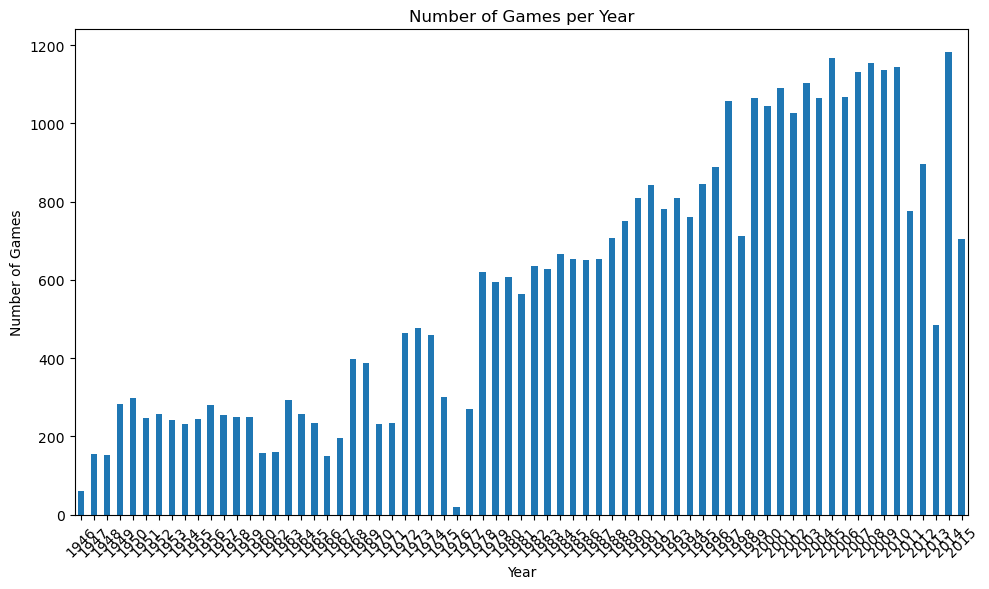

In [118]:

# Find the date when data is missing
missing_dates = merged_df[merged_df.isnull().any(axis=1)]['date_game']
print("\nDates with missing values:\n", missing_dates)

# Create a histogram of missing values based on the game date
plt.figure(figsize=(10, 6))
merged_df['date_game'] = pd.to_datetime(merged_df['date_game'])
merged_df['date_game'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Games per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()

In [119]:
# ---------------------------------------------------------------------
# 3.  Remove rows with missing values and remove duplicate rows
# ---------------------------------------------------------------------

# Remove rows with any missing values
no_missing_df = merged_df.dropna()
# Remove duplicate rows
# cleaned_df = no_missing_df.iloc[::2]

len(no_missing_df)
no_missing_df['game_date'].min()


'1980-05-07 00:00:00'

In [120]:
# ---------------------------------------------------------------------
# 4.  Compare old and new datasets
# ---------------------------------------------------------------------

print("The number of rows in the original dataset is ", len(merged_df))
print("The earliest game in the original dataset is ", merged_df['game_date'].min() )

print("The number of rows in the cleaned dataset is ", len(no_missing_df) )
print("The earliest game in the cleaned dataset is ", no_missing_df['game_date'].min() )

The number of rows in the original dataset is  40363
The earliest game in the original dataset is  1946-11-02 00:00:00
The number of rows in the cleaned dataset is  27506
The earliest game in the cleaned dataset is  1980-05-07 00:00:00


In [121]:
# ---------------------------------------------------------------------
# 5.  Inspect data types
# ---------------------------------------------------------------------

# Inspect data types of each column
data_types = no_missing_df.dtypes
print("\nData types of each column:\n", data_types)


Data types of each column:
 game_id                            int64
TEAM_ABBREVIATION                 object
pts_home                         float64
team_abbreviation_away            object
season_id                          int64
team_id_home                       int64
game_date                         object
wl_home                           object
fgm_home                         float64
fga_home                         float64
fg_pct_home                      float64
fg3m_home                        float64
fg3a_home                        float64
fg3_pct_home                     float64
ftm_home                         float64
fta_home                         float64
ft_pct_home                      float64
oreb_home                        float64
dreb_home                        float64
reb_home                         float64
ast_home                         float64
stl_home                         float64
blk_home                         float64
tov_home                    

In [122]:
# Save the cleaned DataFrame to a new CSV file
output_path = Path("../data/processed/cleaned_combined_kaggle_538_elo.csv")
no_missing_df.to_csv(output_path, index=False)